<a href="https://colab.research.google.com/github/PilliChandu/Predicting-Student-Dropout-due-to-Stress-Factor/blob/main/StudentStressPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the uploaded dataset
data = pd.read_csv("/content/Student Stress Factors (2).csv")

# Show basic information and first few rows
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


(None,
    Kindly Rate your Sleep Quality 😴  \
 0                                 3   
 1                                 4   
 2                                 2   
 3                                 3   
 4                                 2   
 
    How many times a week do you suffer headaches 🤕?  \
 0                                                 1   
 1                                                 1   
 2                                                 1   
 3                                                 2   
 4                                                 3   
 
    How would you rate you academic performance 👩‍🎓?  \
 0                                                 3   
 1                                                 2   
 2                                                 2   
 3                                                 3   
 4                                                 1   
 
    how would you rate your study load?  \
 0                              

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load dataset
data = pd.read_csv("/content/Student Stress Factors (2).csv")


# Step 3: Features (X) and Target (y)
X = data.drop(columns=["How would you rate your stress levels?"])
y = data["How would you rate your stress levels?"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 6: Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)


# Step 7: Predictions
y_pred = model.predict(X_test_scaled)


# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9423076923076923

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.86      0.93        22
           2       1.00      1.00      1.00        21
           3       0.92      0.96      0.94        25
           4       0.83      0.95      0.88        20
           5       1.00      0.94      0.97        16

    accuracy                           0.94       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.95      0.94      0.94       104



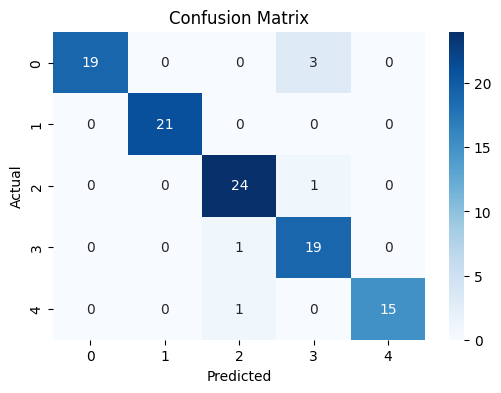

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127934 (\N{TENNIS RACQUET AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


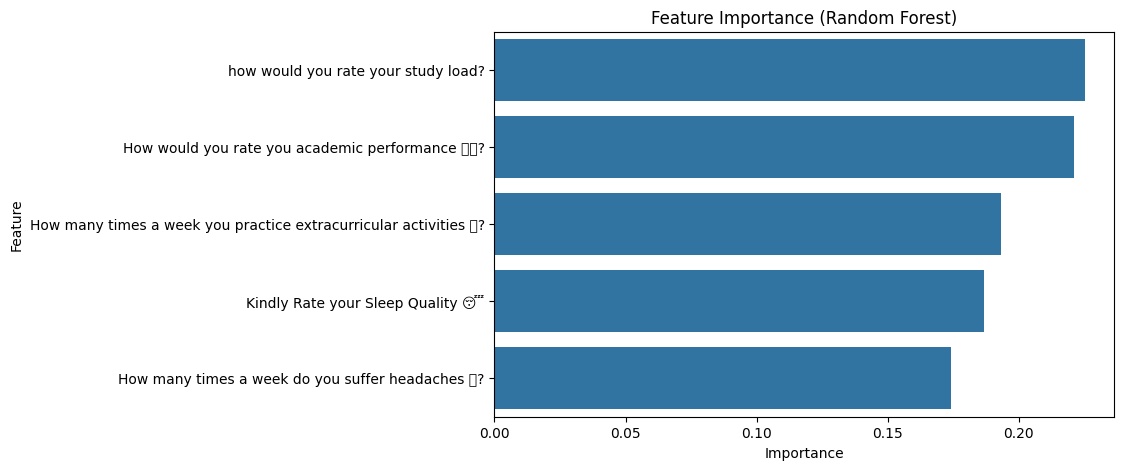

In [5]:
importances = model.feature_importances_
feature_names = X.columns


feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp, x="Importance", y="Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [6]:
example_student = np.array([[3, 2, 3, 4, 2]]) # sleep=3, headaches=2, performance=3, load=4, activities=2
example_student_scaled = scaler.transform(example_student)
print("Predicted Stress Level:", model.predict(example_student_scaled)[0])

Predicted Stress Level: 3


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
